# Breast Cancer Prediction

The goal of this exercise is to predict breast cancer using the Breast cancer Wisconsin dataset available on scikit learn via function sklearn.datasets.load breast_cancer().

We will do so comparing multiple methods, including Logistic Regression, K-Nearest Neighbours, Decision Trees and Support Vector Models.

## Summary

* [1. Dataset Exploration](#1)
    * [1.1 Summary Statistics](#1.1)
    * [1.2 Class Distribution](#1.2)
    * [1.3 Numerical Features](#1.3)
    * [1.4 Correlation heatmap](#1.4)
    * [1.5 Handling missing data](#1.5)
    * [1.6 Standardization](#1.6)
    * [1.7 Feature Selection](#1.7)
    * [1.8 Principal Component Analysis](#1.8)
    
* [2. Model Training and analysis](#2)
    * [2.1 Logistic Regression](#2.1)
    * [2.2 Testing](#2.2)
    * [2.2 Threshold adjustment](#2.3)
* [3. Other models](#3)
    * [3.1 KNN](#3.1)
    * [3.2 DT](#3.2)
    * [3.3 SVM](#3.3)
    * [3.4 Conclusion](#3.4)

<a id='1'></a>
# <u> 1. Dataset Exploration

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the dataset
dataset = sklearn.datasets.load_breast_cancer()
X = pd.DataFrame(data = dataset['data'], columns = dataset['feature_names'])
y = dataset['target']

<a id='1.1'></a>
## <u> 1.1 Summary Statistics

In [3]:
# Shape of the dataset
print('The dataset has', X.shape[0], 'rows, and', X.shape[1], 'columns.')

# Summarize statistcs
statistics = pd.DataFrame(X.describe())
statistics

The dataset has 569 rows, and 30 columns


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<a id='1.2'></a>
## <u> 1.2 Class distribution

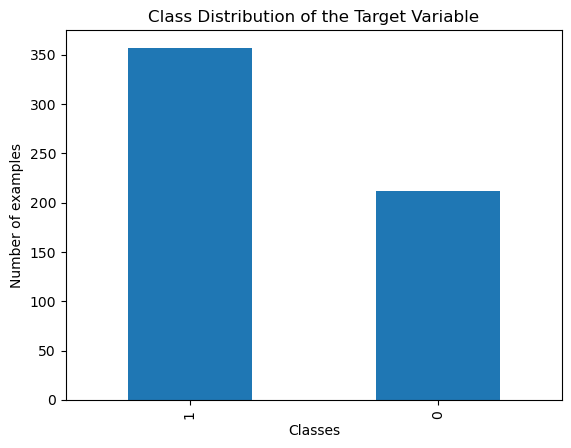

In [8]:
#Plot how the values of the target value are distributed 
pd.Series(y).value_counts().plot(kind='bar')  # Convert the np.array of the target variable into a pd.series in order to apply the value_counts function
plt.title('Class Distribution of the Target Variable')
plt.xlabel('Classes')
plt.ylabel('Number of examples')
plt.show()

There are significantly more examples in class 1 compared to class 0, so the dataset **imbalanced**.

<a id='1.3'></a>
## <u> 1.3 Numerical features 

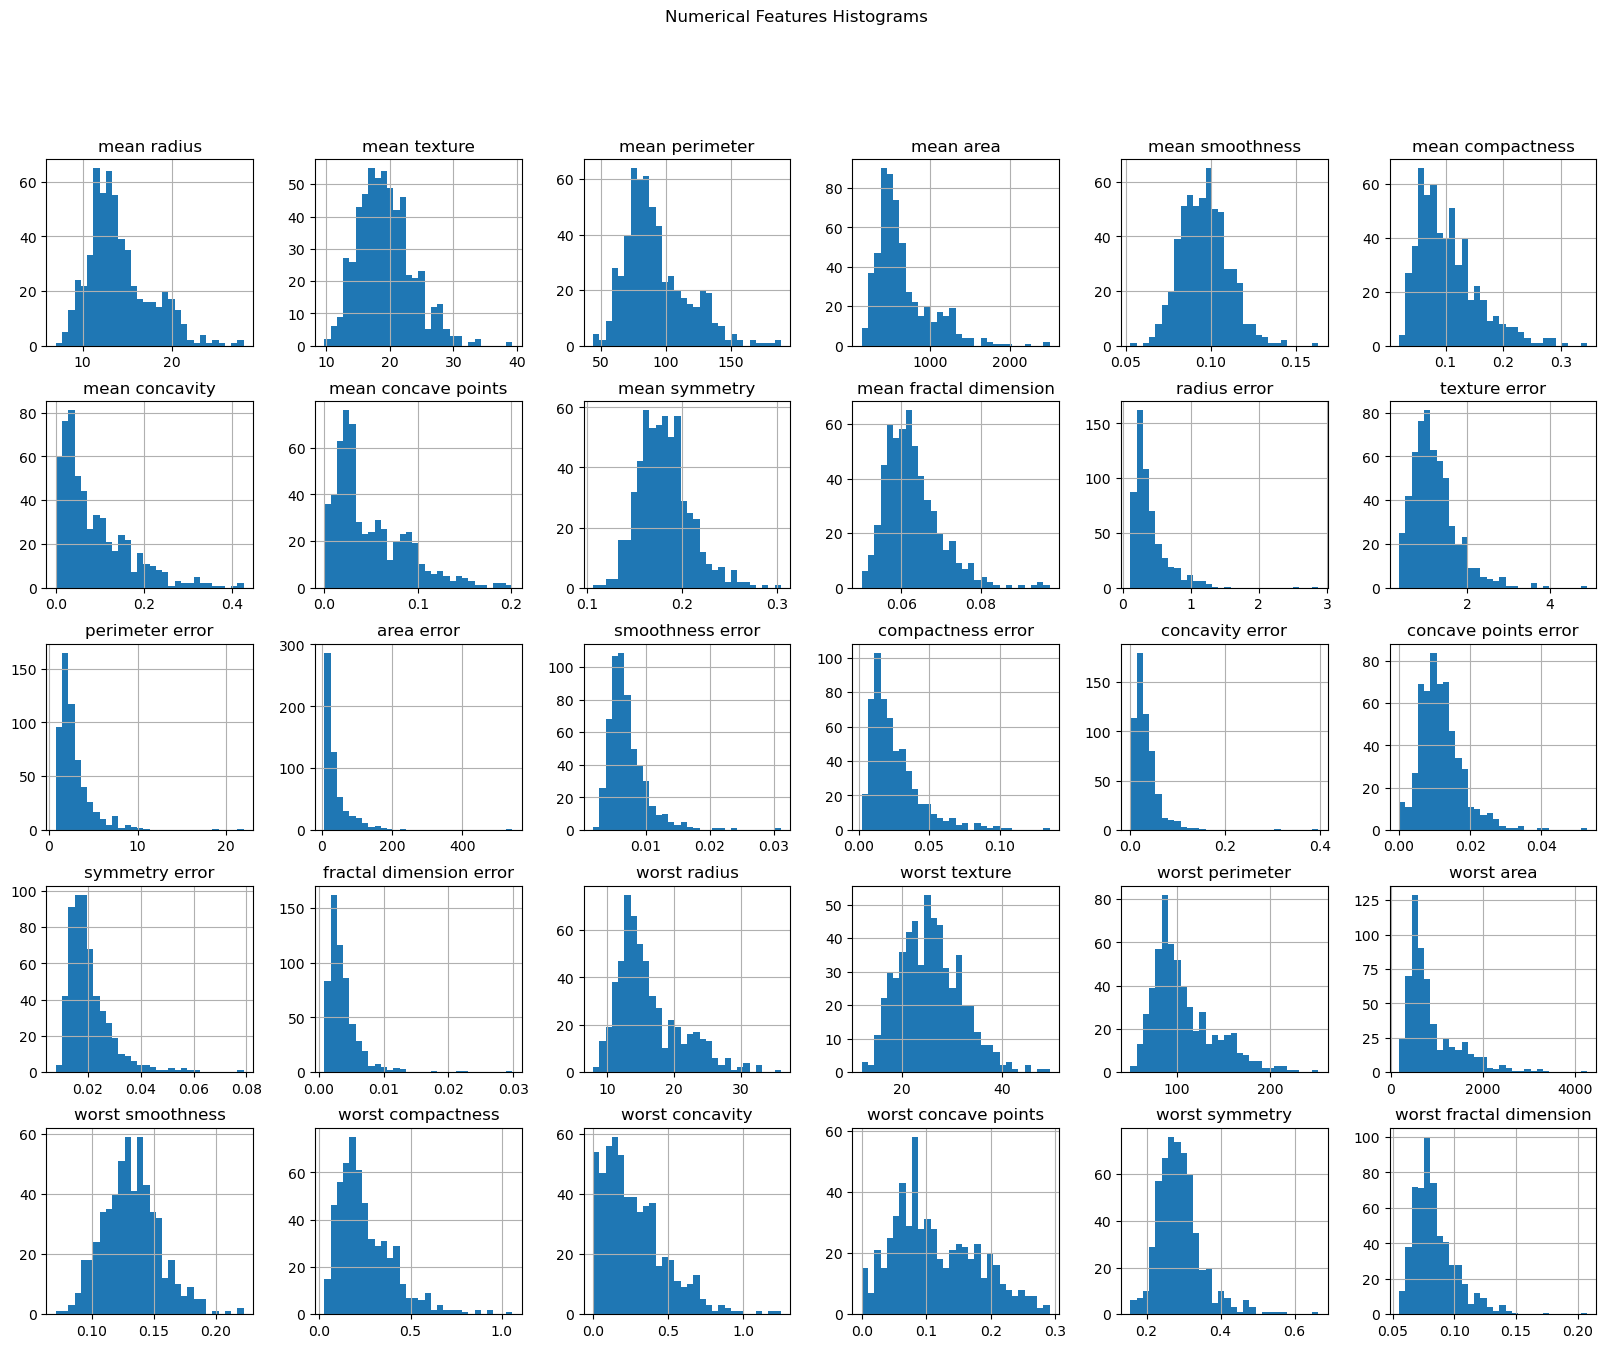

In [11]:
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns 

X[numerical_columns].hist(bins=30, figsize=(20, 15), layout=(5, 6))
plt.suptitle('Numerical Features Histograms')
plt.show()

Given that many of these features have varying ranges (e.g., mean area can go from 0 to over 2000, while mean fractal dimension only goes up to 0.1), standardizing the features will be crucial for models that are sensitive to feature magnitude, such as Logistic Regression, KNN or SVM.

<a id='1.4'></a>
## <u> 1.4 Correlation heatmap

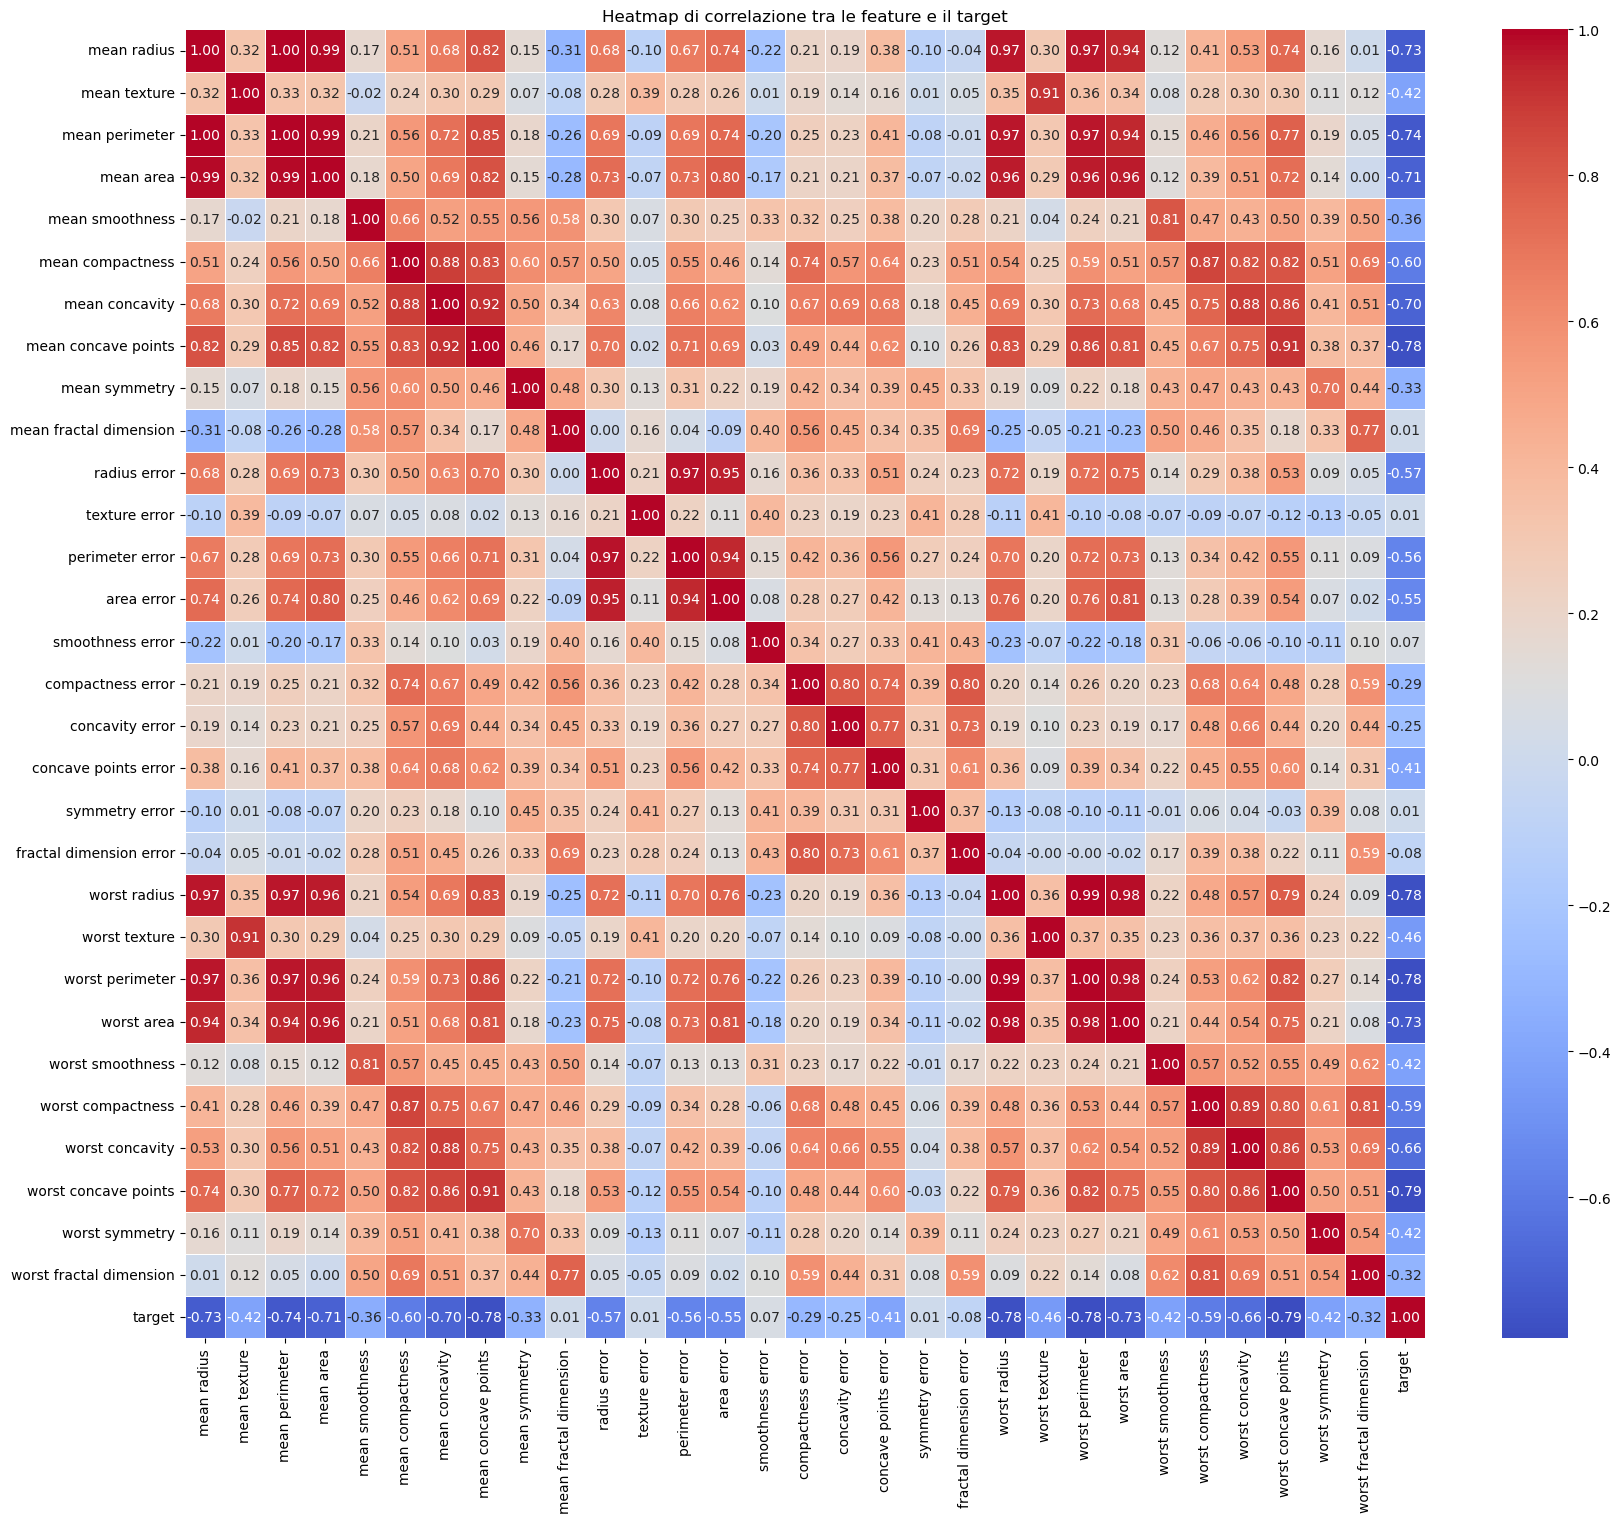

In [14]:
# Correlation Heatmap

# Since X contains just the features I create a new dataframe containing the features and the target variable to get the correlation between them
df = X.copy()
df['target'] = y
correlation_matrix = df.corr()

plt.figure(figsize=(20, 17))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap di correlazione tra le feature e il target')
plt.show()
# The last column of the Correlation Matrix contains all the correlations between each feature and the target

<a id='1.5'></a>
## <u> 1.5 Handling missing data

In [16]:
# Handle missing data

missing_values = df.isnull().sum()
missing_values

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

There are no missing value.

<a id='1.6'></a>
## <u> 1.6 Standardization

In [19]:
# For the reasons stated above in point 5 we decide to standardize all the variables

from sklearn.preprocessing import StandardScaler

# Inizialize the scaler
scaler = StandardScaler()

# Apply the standardization to numerical features 
X_scaled = scaler.fit_transform(X)

# Convert scaled datas in a DataFrame to have a clearer visualization
X_scaled_df = pd.DataFrame(X_scaled, columns = dataset['feature_names'])
X_scaled_df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


<a id='1.7'></a>
## <u> 1.7 Feature Selection

To do this, we will ruse Recursive Feature Elimination (RFE), pairwise correlation analysis and then decide.

In [21]:
# Recursive Feature Elimination (RFE)

from sklearn.feature_selection import RFE
from sklearn.svm import SVR

estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=10, step=3) # We decide to select 10 features
selector = selector.fit(X_scaled, y)

print('The features selected using the RFE method are:')
for i in range(len(dataset['feature_names'])):
    if selector.support_[i]==True:
        print(dataset['feature_names'][i])

The features selected using the RFE method are:
mean radius
mean perimeter
mean area
mean compactness
mean concavity
mean concave points
concavity error
worst radius
worst area
worst compactness


To select features using the Correlation Analysis, we choose those that are most strongly correlated with the target. For this reason, we require that the absolute value of the correlation between the feature and the target must be greater than 0.7.

In [23]:
# Correlation Analysis

# Find pairs of highly correlated features (correlation > 0.8), excluding "Target"
high_corr_pairs = np.where(abs(correlation_matrix) > 0.8)

high_corr_with_values = [(correlation_matrix.index[x], correlation_matrix.columns[y], correlation_matrix.iloc[x, y]) 
                         for x, y in zip(*high_corr_pairs) 
                         if x != y and x < y and 'target' not in [correlation_matrix.index[x], correlation_matrix.columns[y]]]

# Create a DataFrame to display the results
high_corr_df = pd.DataFrame(high_corr_with_values, columns=['Feature 1', 'Feature 2', 'Correlation Coefficient'])

high_corr_df = high_corr_df.sort_values(by='Correlation Coefficient', ascending=False)

print("Features highly correlated:")
display(high_corr_df)

Features highly correlated:


,Feature 1,Feature 2,Correlation Coefficient
0,mean radius,mean perimeter,0.997855
36,worst radius,worst perimeter,0.993708
1,mean radius,mean area,0.987357
7,mean perimeter,mean area,0.986507
37,worst radius,worst area,0.984015
38,worst perimeter,worst area,0.977578
30,radius error,perimeter error,0.972794
10,mean perimeter,worst perimeter,0.970387
3,mean radius,worst radius,0.969539
9,mean perimeter,worst radius,0.969476


We decide to **drop** the following features:
- **mean perimeter** 
- **mean area** 
- **worst perimeter** 
- **worst area** 
- **perimeter error** 
- **area error** 
- **mean concavity** 
- **mean concave points** 
- **worst concave points** 
- **worst concavity** 
- **worst compactness** 
- **compactness error** 
- **concavity error**

In [25]:
selected_features = [
    'mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
    'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error',
    'smoothness error', 'concave points error', 'symmetry error', 'fractal dimension error',
    'worst radius', 'worst texture', 'worst smoothness', 'worst symmetry', 'worst fractal dimension'
]
print('The features selected using the Correlation Analysis are:')
for i in range(len(selected_features)):
        print(selected_features[i])

The features selected using the Correlation Analysis are:
mean radius
mean texture
mean smoothness
mean compactness
mean symmetry
mean fractal dimension
radius error
texture error
smoothness error
concave points error
symmetry error
fractal dimension error
worst radius
worst texture
worst smoothness
worst symmetry
worst fractal dimension


To select features using the Mutual Information method we decide to select features that have a mutual information score higher than the average mutual information score across all features.

In [27]:
#Mutual Information Method

from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split

# Calculate mutual information between every feature and the target
mi_scores = mutual_info_classif(X_scaled, y)

print('The features selected using the Mutual Information Method are:')
for i in range(len(dataset['feature_names'])):
    if mi_scores[i]>=np.mean(mi_scores):
        print(dataset['feature_names'][i])


The features selected using the Mutual Information Method are:
mean radius
mean perimeter
mean area
mean concavity
mean concave points
radius error
perimeter error
area error
worst radius
worst perimeter
worst area
worst compactness
worst concavity
worst concave points


If we consider only the features appearing in the selection of every method, we should select just 2 features. Selecting only 2 features out of 30 might be too restrictive, as it could limit the model’s ability to capture complex relationships within the data. A better approach would be to consider features that appear in at least two of the three methods, which increases the number of selected features while maintaining a level of rigor.

The features that appear in at least two methods are:
- mean area
- mean compactness
- mean concave points
- mean concavity
- mean perimeter
- mean radius
- radius error
- worst area
- worst compactness
- worst radius

By selecting these 10 features, we create a more comprehensive and informative feature set while ensuring consistency across the three methods.

In [29]:
selected_features = [
    'mean area', 'mean compactness', 'mean concave points',
    'mean concavity', 'mean perimeter', 'mean radius', 
    'radius error', 'worst area', 'worst compactness', 'worst radius'
]

X = X[selected_features]
X_scaled = scaler.fit_transform(X)

<a id='1.8'></a>
## <u> 1.8 Prinicpal Component Analysis

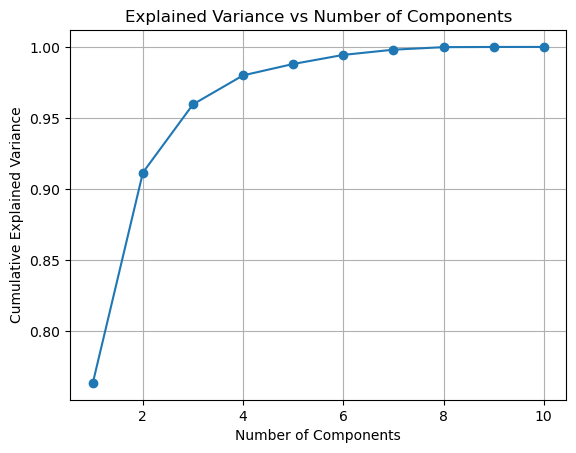

In [31]:
# PCA Analysis

from sklearn.decomposition import PCA

# Empty list to store cumulative explained variance
explained_var = []

# Maximum number of components to test
max_num_components = X_scaled.shape[1]

# Loop to calculate and store cumulative explained variance for each number of components
for num_components in range(1, max_num_components + 1):
    pca_model = PCA(n_components=num_components)
    pca_model.fit(X_scaled)
    explained_var.append(pca_model.explained_variance_ratio_.cumsum()[-1])  # Store the last cumulative value

# Plot cumulative explained variance as a function of the number of components
plt.plot(range(1, max_num_components + 1), explained_var, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid(True)
plt.show()

Looking at the chart, we can notice that the cumulative explained variance tends to stabilize around the seventh component. Although the variance continues to increase slightly beyond the seventh component, the gain in explained variance is very small after this point. Therefore, **7 principal components** seem to be sufficient to explain almost all the variance. Let's proceed with the reduction:

In [33]:
pca_model = PCA(n_components=7)
X_scaled = pca_model.fit_transform(X_scaled)

**11. Split the dataset into an 80-20 train-test split using Scikit-learn’s train test split function, ensuring that the split is stratified to preserve the proportion of benign and malignant cases in both the training and testing sets.**

<a id='2'></a>
# <u> 2. Model Training and Analysis

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state = 101)

**12. Train a Logistic Regression model on the training data. Use both the default settings and experiment with regularization to prevent overfitting.**

**13. Test different values for the regularization parameter C (e.g., 0.01, 0.1, 1, 10) to control the strength of regularization and find the best model.**

<a id='2.1'></a>
## <u> 2.1 Logistic Regression

First without regularization : 

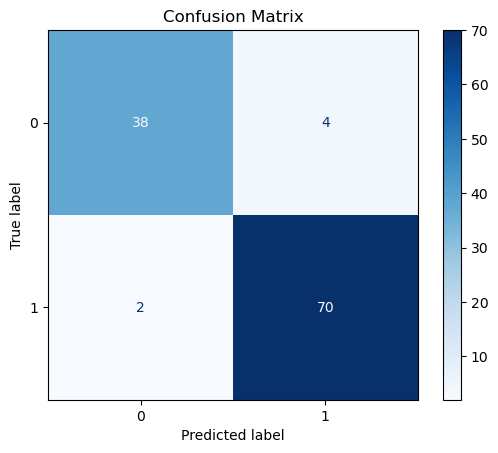

Accuracy: 0.9474
Precision: 0.9459
Recall: 0.9722
F1-score: 0.9589


In [38]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, classification_report

# Train the Logistic Regression model with default settings (which uses L2 regularization by default)
logreg_default = LogisticRegression(random_state=42)
logreg_default.fit(X_train, y_train)

# Make predictions on the test set
y_pred_default = logreg_default.predict(X_test)

# Computing and visualizing the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_default)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Accuracy, Precision, Recall e F1-score
accuracy = accuracy_score(y_test, y_pred_default)
precision = precision_score(y_test, y_pred_default)
recall = recall_score(y_test, y_pred_default)
f1 = f1_score(y_test, y_pred_default)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

With regularization

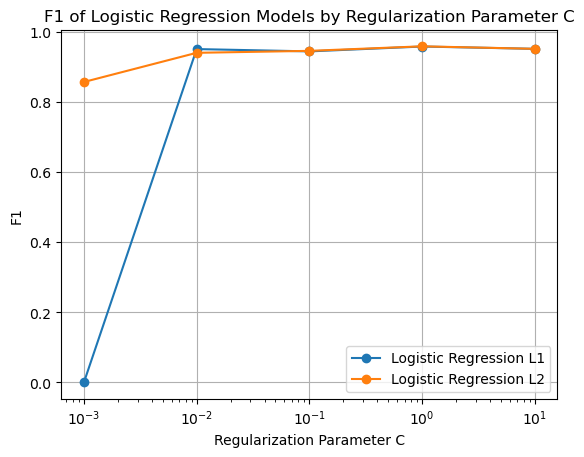

In [39]:
# Experiment with Regularization (L1, L2) and different values of C

C = [(10)**(i) for i in range(-3,2)]
f1_l1 = []
f1_l2 = []

for i in range(len(C)):
    # L1 Regularization (Lasso)
    logreg_l1 = LogisticRegression(penalty = 'l1', solver='liblinear', C = C[i] , random_state = 42)
    logreg_l1.fit(X_train, y_train)
    y_pred_l1 = logreg_l1.predict(X_test)
    f1_l1.append(f1_score(y_test, y_pred_l1))
    # L2 Regularization (Ridge)
    logreg_l2 = LogisticRegression(penalty = 'l2', C= C[i], random_state = 42)
    logreg_l2.fit(X_train, y_train)
    y_pred_l2 = logreg_l2.predict(X_test)
    f1_l2.append(f1_score(y_test, y_pred_l2))

# We decide to plot the F1 of the two logistic regression models (L1 and L2) as the regularization parameter C varies,
# in order to determine which one performs better.

plt.figure()
plt.plot(C, f1_l1, marker='o', label='Logistic Regression L1')
plt.plot(C, f1_l2, marker='o', label='Logistic Regression L2')
plt.xlabel('Regularization Parameter C')
plt.ylabel('F1')
plt.xscale('log')  # x-axes in logaritmic scale
plt.xticks(C) 
plt.title('F1 of Logistic Regression Models by Regularization Parameter C')
plt.legend()
plt.grid(True)
plt.show()

From these analysis we decide to use C = 0.01 with the L1 Regularization

**14. Calculate the accuracy on the test set, draw the Confusion Matrix and calculate Precision, Recall, and F1-score.**

<a id='2.2'></a>
## <u> 2.2 Testing

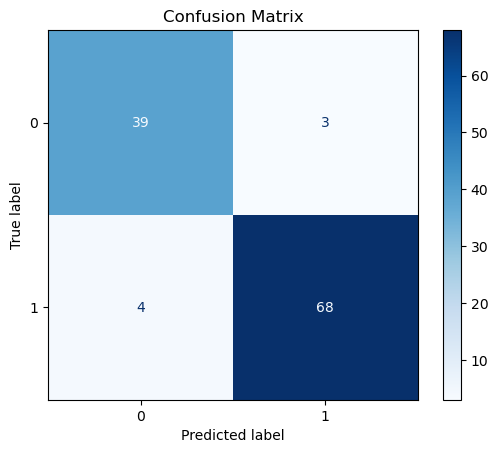

Accuracy: 0.9386
Precision: 0.9577
Recall: 0.9444
F1-score: 0.9510


In [42]:
# Valutating the chosen model

logreg = LogisticRegression(penalty='l1', solver='liblinear', C=0.01, random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Computing and visualizing the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Accuracy, Precision, Recall e F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Maximizing the recall may lead to increased false positives, while maximizing the precision may result in missed malignant cases.
In breast cancer diagnosis, prioritizing recall is favored to ensure that most patients with cancer are identified.

<a id='2.3'></a>
## <u> 2.3 Threshold adjustment

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


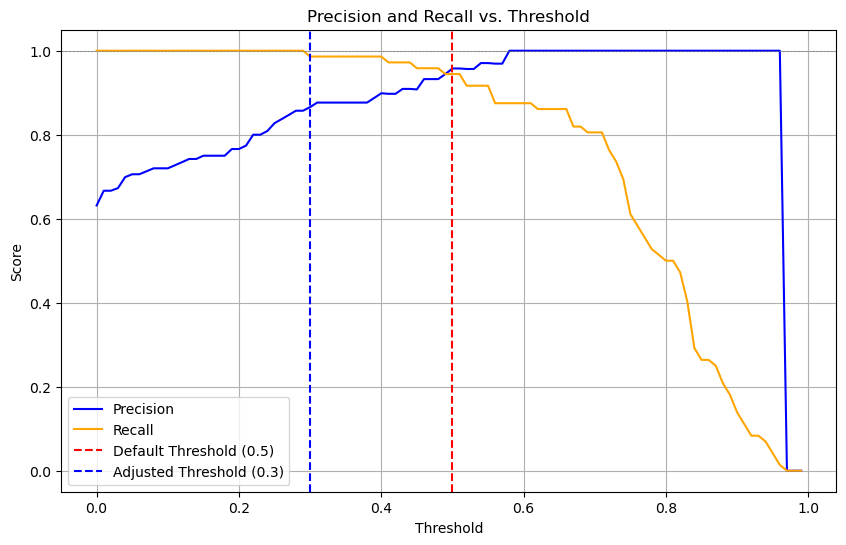

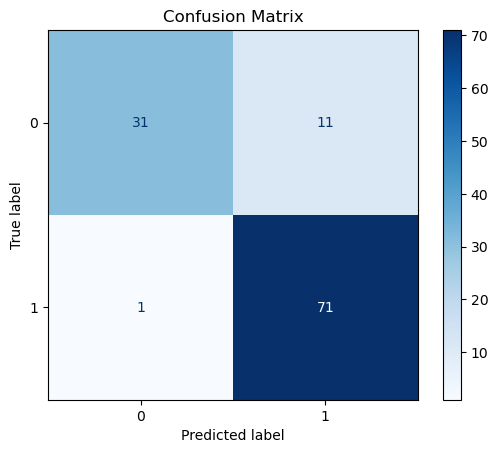

Optimal Threshold: 0.3
Accuracy: 0.8947
Precision: 0.8659
Recall: 0.9861
F1-score: 0.9221


In [46]:
# Train the logistic regression model
logreg = LogisticRegression(penalty='l1', solver='liblinear', C=0.01, random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Get predicted probabilities
y_prob = logreg.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Define a range of thresholds
thresholds = np.arange(0.0, 1.0, 0.01)
precisions = []
recalls = []

# Calculate precision and recall for each threshold
for threshold in thresholds:
    y_pred = (y_prob >= threshold).astype(int)  # Convert probabilities to binary predictions
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision', color='blue')
plt.plot(thresholds, recalls, label='Recall', color='orange')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs. Threshold')
plt.axhline(y=1, color='gray', linestyle='--', linewidth=0.5)  # Optional: Reference line
plt.axvline(x=0.5, color='red', linestyle='--', label='Default Threshold (0.5)')
plt.axvline(x=0.3, color='blue', linestyle='--', label='Adjusted Threshold (0.3)')
plt.legend()
plt.grid()
plt.show()

# Choose an optimal threshold based on desired precision or recall
optimal_threshold = 0.3  # Example threshold favoring recall
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)

# Computing and visualizing the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_optimal)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Accuracy, Precision, Recall e F1-score
accuracy = accuracy_score(y_test, y_pred_optimal)
precision = precision_score(y_test, y_pred_optimal)
recall = recall_score(y_test, y_pred_optimal)
f1 = f1_score(y_test, y_pred_optimal)

print(f"Optimal Threshold: {optimal_threshold}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

**17. Repeat the training analysis using a KNN, a Decision tree model and an SVM model.**

<a id='3'></a>
# <u> 3. Other Models

<a id='3.1'></a>
## <u> 3.1 KNN

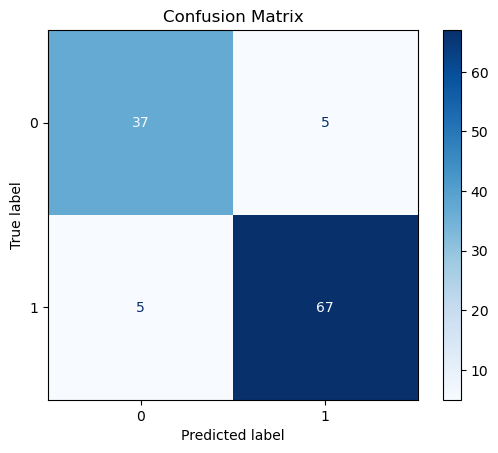

Accuracy: 0.9123
Precision: 0.9306
Recall: 0.9306
F1-score: 0.9306


In [48]:
# KNN model

from sklearn.neighbors import KNeighborsClassifier

K=3
clf = KNeighborsClassifier(K)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Computing and visualizing the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Accuracy, Precision, Recall e F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

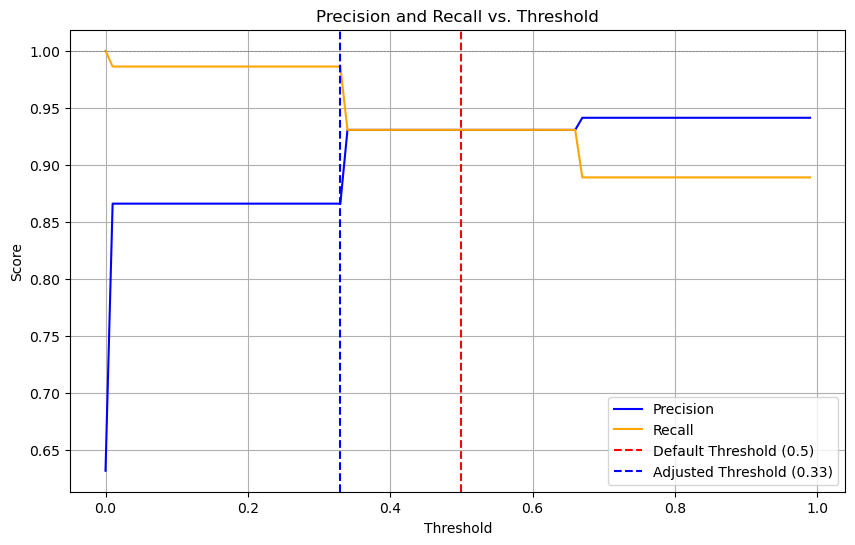

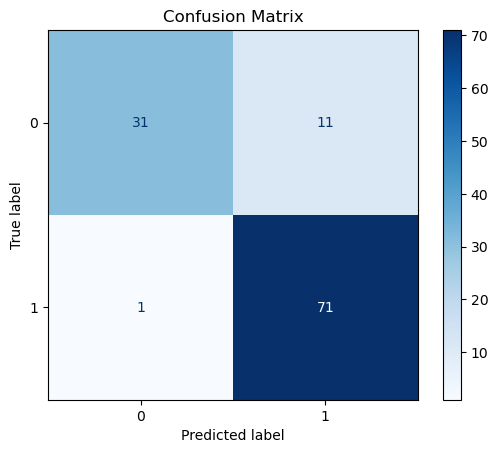

Optimal Threshold: 0.33
Accuracy: 0.8947
Precision: 0.8659
Recall: 0.9861
F1-score: 0.9221


In [49]:
## Train the KNN model
K=3
clf = KNeighborsClassifier(K)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Get predicted probabilities
y_prob = clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Define a range of thresholds
thresholds = np.arange(0.0, 1.0, 0.01)
precisions = []
recalls = []

# Calculate precision and recall for each threshold
for threshold in thresholds:
    y_pred = (y_prob >= threshold).astype(int)  # Convert probabilities to binary predictions
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision', color='blue')
plt.plot(thresholds, recalls, label='Recall', color='orange')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs. Threshold')
plt.axhline(y=1, color='gray', linestyle='--', linewidth=0.5)  # Optional: Reference line
plt.axvline(x=0.5, color='red', linestyle='--', label='Default Threshold (0.5)')
plt.axvline(x=0.33, color='blue', linestyle='--', label='Adjusted Threshold (0.33)')
plt.legend()
plt.grid()
plt.show()

# Choose an optimal threshold based on desired precision or recall
optimal_threshold = 0.33  # Example threshold favoring recall
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)

# Computing and visualizing the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_optimal)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Accuracy, Precision, Recall e F1-score
accuracy = accuracy_score(y_test, y_pred_optimal)
precision = precision_score(y_test, y_pred_optimal)
recall = recall_score(y_test, y_pred_optimal)
f1 = f1_score(y_test, y_pred_optimal)

print(f"Optimal Threshold: {optimal_threshold}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

<a id='3.2'></a>
## <u> 3.2 Decision Tree (DT) Model

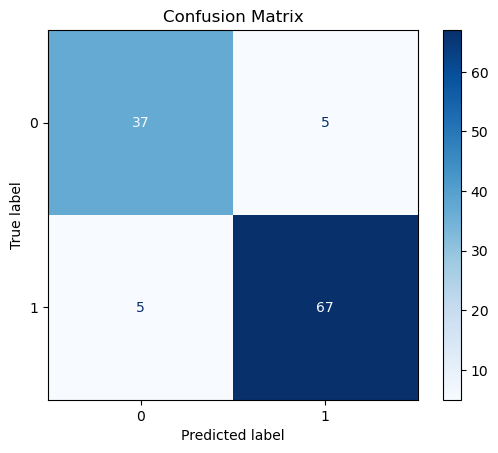

Accuracy: 0.9123
Precision: 0.9306
Recall: 0.9306
F1-score: 0.9306


In [50]:
# Decision Tree Model

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=235, max_depth=10)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Computing and visualizing the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Accuracy, Precision, Recall e F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

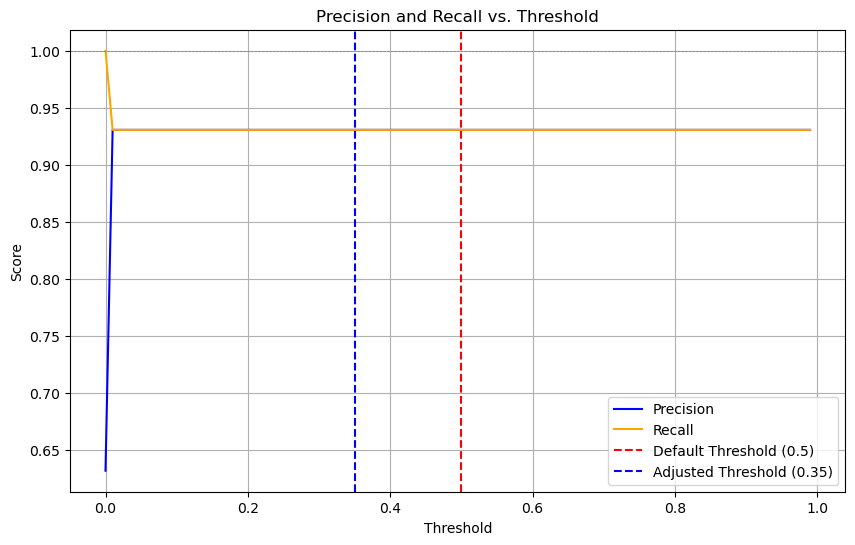

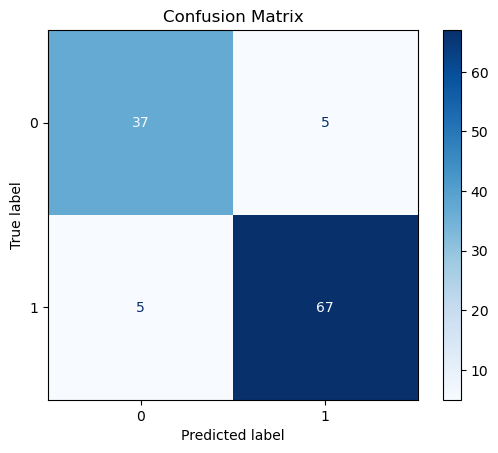

Optimal Threshold: 0.35
Accuracy: 0.9123
Precision: 0.9306
Recall: 0.9306
F1-score: 0.9306


In [51]:
# Train the Decision Tree model
clf = DecisionTreeClassifier(random_state=235, max_depth=10)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Get predicted probabilities
y_prob = clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Define a range of thresholds
thresholds = np.arange(0.0, 1.0, 0.01)
precisions = []
recalls = []

# Calculate precision and recall for each threshold
for threshold in thresholds:
    y_pred = (y_prob >= threshold).astype(int)  # Convert probabilities to binary predictions
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision', color='blue')
plt.plot(thresholds, recalls, label='Recall', color='orange')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs. Threshold')
plt.axhline(y=1, color='gray', linestyle='--', linewidth=0.5)  # Optional: Reference line
plt.axvline(x=0.5, color='red', linestyle='--', label='Default Threshold (0.5)')
plt.axvline(x=0.35, color='blue', linestyle='--', label='Adjusted Threshold (0.35)')
plt.legend()
plt.grid()
plt.show()

# Choose an optimal threshold based on desired precision or recall
optimal_threshold = 0.35  # Example threshold favoring recall
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)

# Computing and visualizing the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_optimal)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Accuracy, Precision, Recall e F1-score
accuracy = accuracy_score(y_test, y_pred_optimal)
precision = precision_score(y_test, y_pred_optimal)
recall = recall_score(y_test, y_pred_optimal)
f1 = f1_score(y_test, y_pred_optimal)

print(f"Optimal Threshold: {optimal_threshold}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

From the graph we can observe that whatever value of the treshold we choose we obtain the same result of precision and recall

<a id='3.3'></a>
## <u> 3.3 Support Vector Model (SVM)

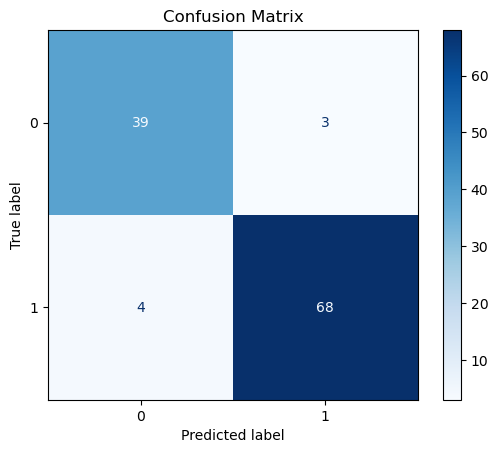

Accuracy: 0.9386
Precision: 0.9577
Recall: 0.9444
F1-score: 0.9510


In [52]:
# SVM Model

from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42)
svm_model = svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# Computing and visualizing the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Accuracy, Precision, Recall e F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

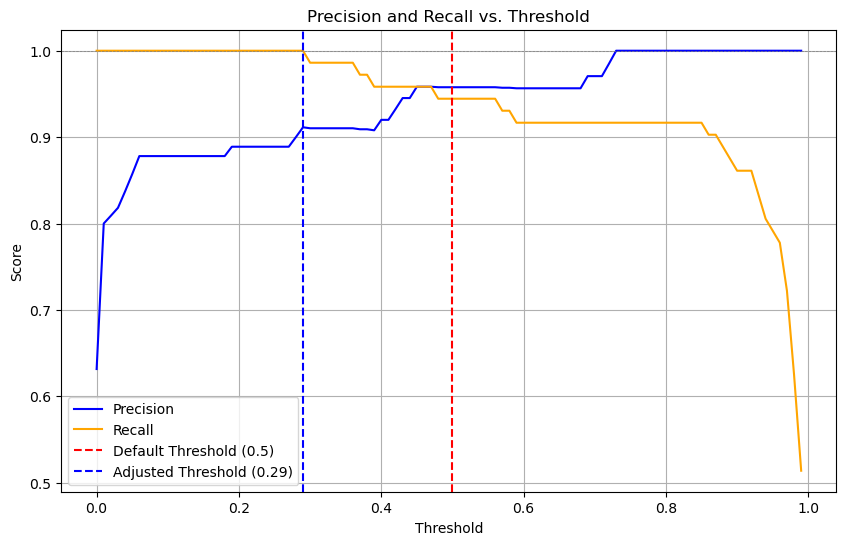

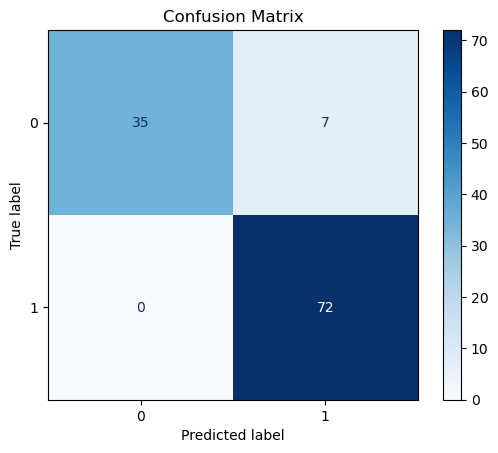

Optimal Threshold: 0.29
Accuracy: 0.9386
Precision: 0.9114
Recall: 1.0000
F1-score: 0.9536


In [53]:
# Train the SVM model
clf = SVC(probability=True, kernel='linear', random_state=42)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Get predicted probabilities
y_prob = clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Define a range of thresholds
thresholds = np.arange(0.0, 1.0, 0.01)
precisions = []
recalls = []

# Calculate precision and recall for each threshold
for threshold in thresholds:
    y_pred = (y_prob >= threshold).astype(int)  # Convert probabilities to binary predictions
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision', color='blue')
plt.plot(thresholds, recalls, label='Recall', color='orange')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs. Threshold')
plt.axhline(y=1, color='gray', linestyle='--', linewidth=0.5)  # Optional: Reference line
plt.axvline(x=0.5, color='red', linestyle='--', label='Default Threshold (0.5)')
plt.axvline(x=0.29, color='blue', linestyle='--', label='Adjusted Threshold (0.29)')
plt.legend()
plt.grid()
plt.show()

# Choose an optimal threshold based on desired precision or recall
optimal_threshold = 0.29  # Example threshold favoring recall
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)

# Computing and visualizing the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_optimal)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Accuracy, Precision, Recall e F1-score
accuracy = accuracy_score(y_test, y_pred_optimal)
precision = precision_score(y_test, y_pred_optimal)
recall = recall_score(y_test, y_pred_optimal)
f1 = f1_score(y_test, y_pred_optimal)

print(f"Optimal Threshold: {optimal_threshold}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

We can observe that in this case we already have the highest recall as possible, so we don't look for another value of the treshold

<a id='3.4'></a>
## <u> 3.4 Conclusion

The best model is the **SVM Model** since it has the highest recall (100%) and F1 score